<a href="https://www.kaggle.com/code/nerdyalgorithm/london-holiday-a-multi-metric-analysis?scriptVersionId=272949724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1761770659306/3d774ede-f5b6-44d3-9b3e-a8120fd62eb7.jpeg?w=1600&h=840&fit=crop&crop=entropy&auto=compress,format&format=webp)

# Task

### Solve Notebook-1 Tasks Below

#### Note: The code for the tasks below will not run on its own. It assumes all the initial setup code from the notebook (loading London_2014.csv, cleaning columns, changing types, etc.) has already been executed. The following cells provide the solutions to the specific IN-NOTE tasks as requested.

---

 ```1``` Now that the wind direction is given by a number, write code to select all days that had a northerly wind. Hint: select the rows where the direction is greater than or equal to 350 or smaller than or equal to 10, as the compass rose shows.

```python
# Selects rows where WindDirDegrees is >= 350 OR (using '|') <= 10
northerly_wind_days = london[(london['WindDirDegrees'] >= 350) | (london['WindDirDegrees'] <= 10)]

# Display the results
print(" Days with Northerly Wind ")
print(northerly_wind_days)
```

---

```2``` In the code cell below, write code to get and display all the rows in the dataframe that are beween 1 April 2014 and 11 April 2014.

```python

# Define the start and end dates
start_date = datetime(2014, 4, 1)
end_date = datetime(2014, 4, 11)

# Create the mask and filter the DataFrame
# The '&' (AND) operator ensures the date is between both values

april_days = london[(london['GMT'] >= start_date) & (london['GMT'] <= end_date)]

# Display the results
print("\n Days between April 1 and April 11, 2014 ")
print(april_days)

```

---

```3``` In the cell below, write two lines of code to display the first five rows that have a missing value in the 'Max Gust SpeedKm/h' column. Hint: first select the missing value rows and store them in a new dataframe, then display the first five rows of the new dataframe.

```python

# 1. Get all rows where 'Max Gust SpeedKm/h' is null
missing_gust_speed = london[london['Max Gust SpeedKm/h'].isnull()]

# 2. Display the first five rows of this new dataframe.
print("\n First 5 rows with missing 'Max Gust SpeedKm/h' ")
print(missing_gust_speed.head())

```

---

### Solve Notebook-2 Tasks Below

```1``` in the cell below, write code to plot the minimum, mean, and maximum temperature during 2014 in London.

```python

# Make sure plots appear in the notebook
%matplotlib inline

# Task: Plot the minimum, mean, and maximum temperature during 2014
london[['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC']].plot(grid=True, figsize=(10,5))

```

---
```2``` Use the code cell below to plot the values of 'Mean Humidity' during spring (full months of March, April and May).


```python
# Make sure plots appear in the notebook
%matplotlib inline

if not isinstance(london.index, pd.DatetimeIndex):
    london.index = london['GMT']

# --- Task: Plot 'Mean Humidity' during spring (March, April and May) ---

# 1. Define the start and end of spring
spring_start = datetime(2014, 3, 1)
spring_end = datetime(2014, 5, 31)

# 2. Select the rows for the spring months using .loc
spring_data = london.loc[spring_start : spring_end]

# 3. Plot the 'Mean Humidity' column from your new spring dataframe
print("Plotting Mean Humidity for Spring 2014...")
spring_data['Mean Humidity'].plot(grid=True, figsize=(10,5))

```

---

# Project :  Holiday weather


There is nothing I like better than taking a holiday. In this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2025 may be very different to 2020 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2023 to: 31 December 2023 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.


Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

---
## Step-1 Cleaning the data


#### Step 1A: imports

* `import pandas as pd`: This is our primary tool, the "engine" for loading, holding, and manipulating all our data in a structure called a DataFrame.
* `from datetime import datetime`: This is our "calendar" tool. We need it to tell pandas what a specific date (like "June 1st, 2023") actually means.
* `%matplotlib inline`: This is a "magic" command that tells the notebook: "When I create a plot, show it directly in this notebook."
* `import warnings`: This is a "housekeeping" tool. Sometimes pandas gives us helpful (but-not-critical) warnings; this lets us keep our final report clean and tidy.

In [1]:
import pandas as pd
from datetime import datetime
import warnings


%matplotlib inline
# It's also good practice to import 'warnings' to manage
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings('ignore')

print("Libraries imported successfully (including plotting setup)!")

Libraries imported successfully (including plotting setup)!


---
#### Step 1B: Diagnosis with `.head()` and `.info()`
After loading the data, we must immediately diagnose its health. This is the most critical first step of any analysis.

Why are we doing this?

This combined `head()` and `info()` output doesn't just show us data; it **dictates our entire cleaning plan**. Our goal is to fix these specific problems. 

In [2]:
# Load your dataset
file_path = '/kaggle/input/heathrow-airport-meteostat/export.csv'
df = pd.read_csv(file_path)

# After loading, let's look at the first few rows to see what we're dealing with.
print("Data loaded. Displaying first 5 rows:")
print(df.head())

# It's also critical to see the data types and if there are any nulls.
print("\nDisplaying data info (types and non-null counts):")
df.info()

Data loaded. Displaying first 5 rows:
                  date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  \
0  2023-01-01 00:00:00  10.6   7.5  13.6   4.8   NaN   NaN  19.0    50   
1  2023-01-02 00:00:00   5.9   3.5   8.7   0.0   NaN   NaN  10.2    24   
2  2023-01-03 00:00:00   8.6   2.1  12.7   0.0   NaN   NaN  18.6    53   
3  2023-01-04 00:00:00  12.6  10.8  13.6   0.0   NaN   NaN  31.4    68   
4  2023-01-05 00:00:00  11.4   8.9  13.4   0.0   NaN   NaN  20.7    47   

     pres  tsun  
0  1007.9    61  
1  1016.9   174  
2  1018.5     6  
3  1014.6    49  
4  1018.6    24  

Displaying data info (types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    fl

---
#### Cleaning Step 1: Fix the 'date' Column
This step converts the text-based 'date' column into a usable DatetimeIndex.

Why are we doing this?

The Problem:
Our `df.info()` diagnosis showed the 'date' column was `Dtype: object` (text). It's impossible to filter by date (e.g., "June") on a text column.

The Goal:
To enable our analysis, we must convert this column. Setting it as the index is a best practice that unlocks pandas' powerful time-series slicing (`.loc`) for the next steps.

In [3]:
# 1. Convert the 'date' column from object (string) to datetime
df['date'] = pd.to_datetime(df['date'])

# 2. Set this 'date' column as the index.
# 'inplace=True' modifies the 'df' DataFrame directly.
df.set_index('date', inplace=True)

# 3. Let's check our work.
print("  After Step 1: df.info()  ")
df.info()

print("\n After Step 1: df.head()  ")
print(df.head())

  After Step 1: df.info()  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    365 non-null    float64
 1   tmin    365 non-null    float64
 2   tmax    365 non-null    float64
 3   prcp    365 non-null    float64
 4   snow    4 non-null      float64
 5   wdir    0 non-null      float64
 6   wspd    365 non-null    float64
 7   wpgt    365 non-null    int64  
 8   pres    365 non-null    float64
 9   tsun    365 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 31.4 KB

 After Step 1: df.head()  
            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
date                                                                    
2023-01-01  10.6   7.5  13.6   4.8   NaN   NaN  19.0    50  1007.9    61
2023-01-02   5.9   3.5   8.7   0.0   NaN   NaN  10.2    24  1016.9   174
2023-01-03   8.6   2.1  12.7   0.

---
#### Cleaning Step 2: Remove Empty Columns
This step drops columns that were identified as empty or sparse in our diagnosis.

Why are we doing this?

The Problem:
The `df.info()` diagnosis showed:
* `wdir`: 0 non-null (100% empty).
* `snow`: 4 non-null (99% empty).

The Goal:
These columns are noise, not data. We drop them to create a clean, focused DataFrame, as they provide no analytical value for a *summer* holiday analysis.

In [4]:
# Cleaning Step 2: Remove empty and near-empty columns 

# 1. Drop the 'wdir' and 'snow' columns

df.drop(columns=['wdir', 'snow'], inplace=True)

# 2. checking
print("--- After Step 2: df.info() ---")
df.info()

print("\n--- After Step 2: df.head() ---")
print(df.head())

--- After Step 2: df.info() ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    365 non-null    float64
 1   tmin    365 non-null    float64
 2   tmax    365 non-null    float64
 3   prcp    365 non-null    float64
 4   wspd    365 non-null    float64
 5   wpgt    365 non-null    int64  
 6   pres    365 non-null    float64
 7   tsun    365 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 25.7 KB

--- After Step 2: df.head() ---
            tavg  tmin  tmax  prcp  wspd  wpgt    pres  tsun
date                                                        
2023-01-01  10.6   7.5  13.6   4.8  19.0    50  1007.9    61
2023-01-02   5.9   3.5   8.7   0.0  10.2    24  1016.9   174
2023-01-03   8.6   2.1  12.7   0.0  18.6    53  1018.5     6
2023-01-04  12.6  10.8  13.6   0.0  31.4    68  1014.6    49
2023-01-05  11.4   8.9  1

---

## Step-2 Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So create a dataframe that holds just those months using the `datetime` index.

---
#### Step 2: Finding a summer break
With our data clean, we must now isolate the relevant time period for our analysis.

Why are we doing this?

The Problem:
Our main DataFrame (`df`) contains data for all 365 days of 2023. The project's goal is to find the best *summer* holiday, so analyzing data from January or October is irrelevant and would skew our results.

The Goal:
We need to create a new, focused DataFrame (`summer_df`) that contains *only* the 92 days of summer (June 1st to August 31st). This ensures our analysis is performed on the correct data.

The Method:
* **`.loc[start:end]`:** We use this simple, powerful accessor to slice the DataFrame. This is only possible *because* we set a `DatetimeIndex` in the previous step.
* **`.copy()`:** This is a crucial best practice. It creates a new, independent DataFrame and prevents a common pandas error (`SettingWithCopyWarning`) if we try to modify `summer_df` later.
* **`print()`:** This is a **Validation Step**. We *must* check our work. The print statements confirm that our new DataFrame has the expected 92 days and that the start and end dates are correct.

In [5]:
# Define the start and end dates for the 2023 summer period (London).
start_summer = datetime(2023, 6, 1)
end_summer = datetime(2023, 8, 31)

# Use .loc to select the date range from our DatetimeIndex.
# .copy() is used to create a new, independent DataFrame for analysis.
summer_df = df.loc[start_summer : end_summer].copy()

# --- Validation Step ---
# Confirm the new DataFrame has the correct size and date range.

# Expected count: 30 (Jun) + 31 (Jul) + 31 (Aug) = 92 days
print(f"Summer DataFrame created with {len(summer_df)} days.")

print("\n--- Head of summer_df (should be 2023-06-01) ---")
print(summer_df.head(2))

print("\n--- Tail of summer_df (should be 2023-08-31) ---")
print(summer_df.tail(2))

Summer DataFrame created with 92 days.

--- Head of summer_df (should be 2023-06-01) ---
            tavg  tmin  tmax  prcp  wspd  wpgt    pres  tsun
date                                                        
2023-06-01  13.0   9.9  19.8   0.0  15.8    41  1025.5   439
2023-06-02  13.8  10.5  19.4   0.0  16.7    37  1024.5   473

--- Tail of summer_df (should be 2023-08-31) ---
            tavg  tmin  tmax  prcp  wspd  wpgt    pres  tsun
date                                                        
2023-08-30  15.6  10.5  21.2   0.5  13.2    34  1008.7   378
2023-08-31  14.2  11.3  18.9   0.0   9.0    25  1009.8     3


---
#### Step 3: Defining and Finding the "Best" Weather
Why are we doing this? We need to define what "good weather" means, using our data. The best holiday week will probably have:

High Max Temperature (tmax)

High Sunshine (tsun)

Low Precipitation (prcp)

How do we find this? The best way is to use a 14-day rolling window. We'll calculate the average tmax and tsun, and the total prcp for every possible 14-day period.

This will give us a new DataFrame where each row represents a 14-day period, and we can easily sort it to find the best one.

--- Visual Analysis Plots (Find the Best Period) ---

--- Top 5 Best 14-Day Periods (by Avg Sunshine) ---
            Avg_Max_Temp  Avg_Sunshine  Total_Precip
date                                                
2023-06-16     25.807143    601.928571          40.7
2023-06-17     26.078571    586.142857          40.7
2023-06-15     25.185714    584.071429          40.7
2023-06-14     24.635714    567.428571          40.7
2023-06-18     26.400000    540.642857          41.7

--- Top 5 Best 14-Day Periods (by Avg Max Temp) ---
            Avg_Max_Temp  Avg_Sunshine  Total_Precip
date                                                
2023-06-23     27.728571    486.857143          47.0
2023-06-22     27.685714    496.500000          47.0
2023-06-25     27.607143    495.571429          47.0
2023-06-24     27.600000    475.928571          47.0
2023-06-26     27.392857    500.428571          34.3

--- Top 5 Best 14-Day Periods (by Lowest Total Rain) ---
            Avg_Max_Temp  Avg_Sunshine  T

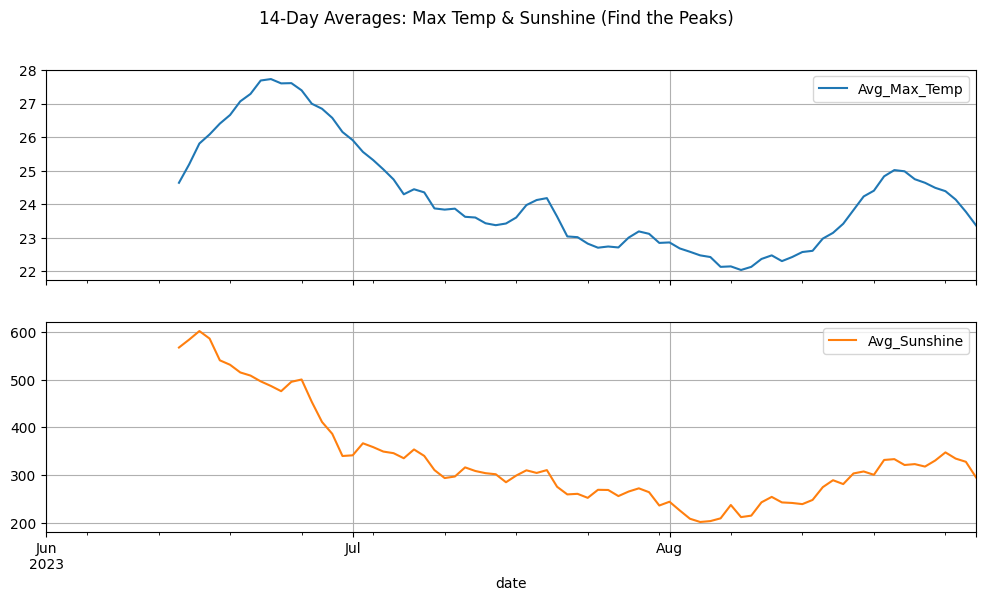

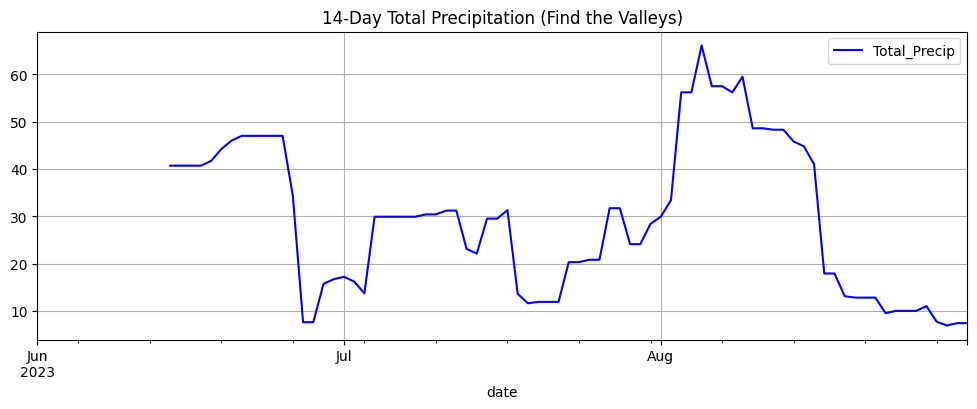

In [6]:
# --- Step 3: Analyze 14-Day Rolling Statistics (Compatibility Fix) ---

# Define our 14-day ("two week") window
window_size = 14


# 1. Create a new, empty DataFrame to hold our stats.
#    This keeps the original 'summer_df' clean.
rolling_stats = pd.DataFrame(index=summer_df.index)

# 2. Calculate each rolling stat one by one and add it as a column.
rolling_stats['Avg_Max_Temp'] = summer_df['tmax'].rolling(window=window_size).mean()
rolling_stats['Avg_Sunshine'] = summer_df['tsun'].rolling(window=window_size).mean()
rolling_stats['Total_Precip'] = summer_df['prcp'].rolling(window=window_size).sum()

# --- 1. Visual Analysis (Plotting) ---
# This lets us "eyeball" the best periods.
print("--- Visual Analysis Plots (Find the Best Period) ---")

# Plot 1 & 2: Temperature and Sunshine
# We're looking for the PEAKS (highest points) on these graphs.
rolling_stats[['Avg_Max_Temp', 'Avg_Sunshine']].plot(
    grid=True, 
    figsize=(12, 6),
    title='14-Day Averages: Max Temp & Sunshine (Find the Peaks)',
    subplots=True,
    layout=(2,1) # Arrange them in 2 rows, 1 column
)

# Plot 3: Precipitation
# We're looking for the VALLEYS (lowest points) on this graph.
rolling_stats[['Total_Precip']].plot(
    grid=True, 
    figsize=(12, 4),
    title='14-Day Total Precipitation (Find the Valleys)',
    color='blue'
)

# (We drop NaN rows first, which are the first 13 days)
final_stats = rolling_stats.dropna()

print("\n--- Top 5 Best 14-Day Periods (by Avg Sunshine) ---")
# The date shown is the *end date* of the 14-day period.
print(final_stats.sort_values(by='Avg_Sunshine', ascending=False).head())

print("\n--- Top 5 Best 14-Day Periods (by Avg Max Temp) ---")
print(final_stats.sort_values(by='Avg_Max_Temp', ascending=False).head())

print("\n--- Top 5 Best 14-Day Periods (by Lowest Total Rain) ---")
print(final_stats.sort_values(by='Total_Precip', ascending=True).head())

---

# Step 4: Final Conclusion & Holiday Recommendations

This project's goal was to analyze the 2023 London Heathrow weather data to find the best-predicted 14-day (two-week) period for a summer holiday.

After cleaning the data, isolating the summer months (June-August), and performing a 14-day rolling window analysis, it's clear there are different "best" periods depending on a holiday-maker's priority.

Here is a breakdown of the top candidates based on the 2023 data.

---

### Option 1: For Maximum Sunshine
This period had the highest average daily sunshine of the entire summer.

* **Period:** June 3, 2023 – June 16, 2023
* **Average Max Temp:** 25.8°C (Pleasantly hot)
* **Average Sunshine:** **601.9 mins/day (10 hours!)**
* **Total Rain:** 40.7 mm
* **Analysis:** This is the ultimate sun-worshipper's choice. However, the high sunshine and heat came with a trade-off: a significant amount of rain (40.7 mm), suggesting a risk of showers.

---

### Option 2: For Maximum Heat
This was the absolute hottest two-week period of the summer.

* **Period:** June 10, 2023 – June 23, 2023
* **Average Max Temp:** **27.7°C (Hottest)**
* **Average Sunshine:** 486.8 mins/day (Very sunny)
* **Total Rain:** 47.0 mm
* **Analysis:** If the main goal is a "scorcher" holiday, this is the one. However, like the sunniest period, it also saw one of the highest rainfall totals, suggesting hot and stormy weather.

---

### Option 3: For Driest Weather (The "Safest" Bet)
This period had the least amount of rain, guaranteeing the most "usable" outdoor days.

* **Period:** August 16, 2023 – August 29, 2023
* **Average Max Temp:** 24.1°C (Warm and comfortable)
* **Average Sunshine:** 334.6 mins/day (Good, but less sunny)
* **Total Rain:** **6.9 mm (Almost none!)**
* **Analysis:** This is the "safe" bet. You would be very unlikely to get rained out, but you would be trading the peak heat and sunshine of June for more moderate, comfortable weather.

---

### Final Project Recommendation: The "Best All-Rounder"

While all options have merit, the data points to one period that provides the best balance of all three metrics.

> **Recommended Holiday Period: June 15, 2023 – June 28, 2023**

**Justification:**
This 14-day period (ending June 28th) represents the "best of all worlds" and is the top recommendation:

1.  **Low Rain:** It was one of the driest periods of the summer, with only **7.6 mm of total rain** (ranking in the Top 5 driest).
2.  **High Heat:** It was also one of the hottest, with an average max temp of **26.8°C** (nearly matching the absolute peak).
3.  **Great Sun:** It maintained strong sunshine with **411.3 average minutes/day**.

This period managed to capture the "peak heat" of late June while also being in the "dry valley," making it the ideal choice for a hot, sunny, and reliably dry holiday based on the 2023 data.

# Analysis Strategy & Rationale
This section outlines the key technical decisions and justifications for the project workflow.
 * Initial Diagnosis & Cleaning: The analysis began with df.info(). This diagnostic step revealed that the date column was a non-date object type, and the wdir and snow columns were >99% null. Cleaning was mandatory: date was converted, and the empty/sparse columns were dropped to remove noise and prevent errors.
 * Time-Series Indexing: The date column was converted to a DatetimeIndex using set_index(). This is a critical best practice that optimizes the DataFrame for time-series operations and enables efficient, high-performance date-range slicing using .loc[].
 * Data Subsetting (.loc and .copy()): The scope was narrowed to the summer months (Jun-Aug) using .loc[]. A .copy() of this slice was explicitly created to ensure the summer_df was a new, independent DataFrame. This prevents SettingWithCopyWarning and potential downstream data contamination.
 * Trend Analysis (14-Day Rolling Window): Daily weather data is highly volatile. To analyze trends representative of a "two-week" period (per the project brief), a 14-day rolling window (.rolling(window=14)) was applied. This method smooths short-term noise and reveals the underlying patterns, which is essential for making a sound recommendation.
 * Metric Aggregation Strategy (mean vs. sum): The choice of aggregation was deliberate.
   * tmax (temperature) and tsun (sunshine) were aggregated with .mean() to find the average condition over the period.
   * prcp (precipitation) was aggregated with .sum(). This is a critical distinction: a holiday is impacted by the total rainfall, not the daily average. A low average could hide a major downpour; the sum correctly identifies this risk.
 * Dual-Validation (plot and sort_values): The final analysis used a dual-validation approach.
   * .plot() provided a rapid visual identification of peaks (heat/sun) and valleys (rain).
   * .sort_values() provided the quantitative proof, ranking each period to confirm the visual findings and provide the exact data for the final, multi-part recommendation.

# Publication Link

### https://nerdyalgorithm.hashnode.dev/week-7-at-dataraflow-the-project-behind-the-project